In [1]:
!pip install imgaug

In [8]:
import imageio
import imgaug as ia
import matplotlib.pyplot as plt
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline
ia.seed(1)

C:\Users\gaby3\AppData\Local\Temp\ipykernel_14732\2684353545.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/8/8e/Yellow-headed_caracara_%28Milvago_chimachima%29_on_capybara_%28Hydrochoeris_hydrochaeris%29.JPG")


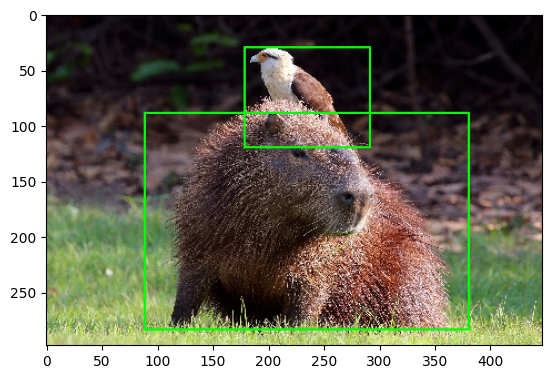

In [9]:
image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/8/8e/Yellow-headed_caracara_%28Milvago_chimachima%29_on_capybara_%28Hydrochoeris_hydrochaeris%29.JPG")
image = ia.imresize_single_image(image, (298, 447))

bbs = BoundingBoxesOnImage([
    BoundingBox(x1=0.2*447, x2=0.85*447, y1=0.3*298, y2=0.95*298),
    BoundingBox(x1=0.4*447, x2=0.65*447, y1=0.1*298, y2=0.4*298)
], shape=image.shape)

plt.imshow(bbs.draw_on_image(image, size=2))

In [10]:
from imgaug import augmenters as iaa 
ia.seed(1)

seq = iaa.Sequential([
    iaa.GammaContrast(1.5),
    iaa.Affine(translate_percent={"x": 0.1}, scale=0.8)
])

In [11]:
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

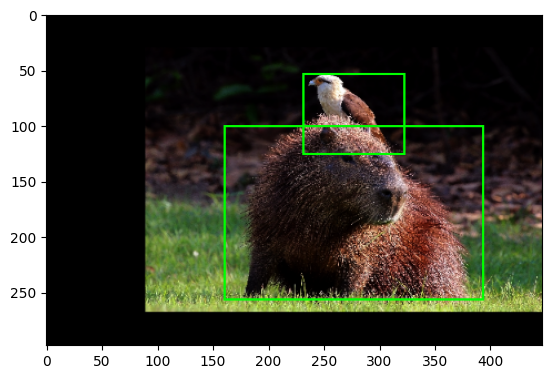

In [12]:
plt.imshow(bbs_aug.draw_on_image(image_aug, size=2))

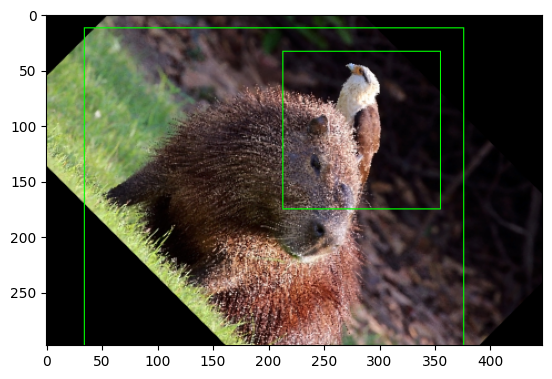

In [13]:
image_aug, bbs_aug = iaa.Affine(rotate=45)(image=image, bounding_boxes=bbs)
plt.imshow(bbs_aug.draw_on_image(image_aug))

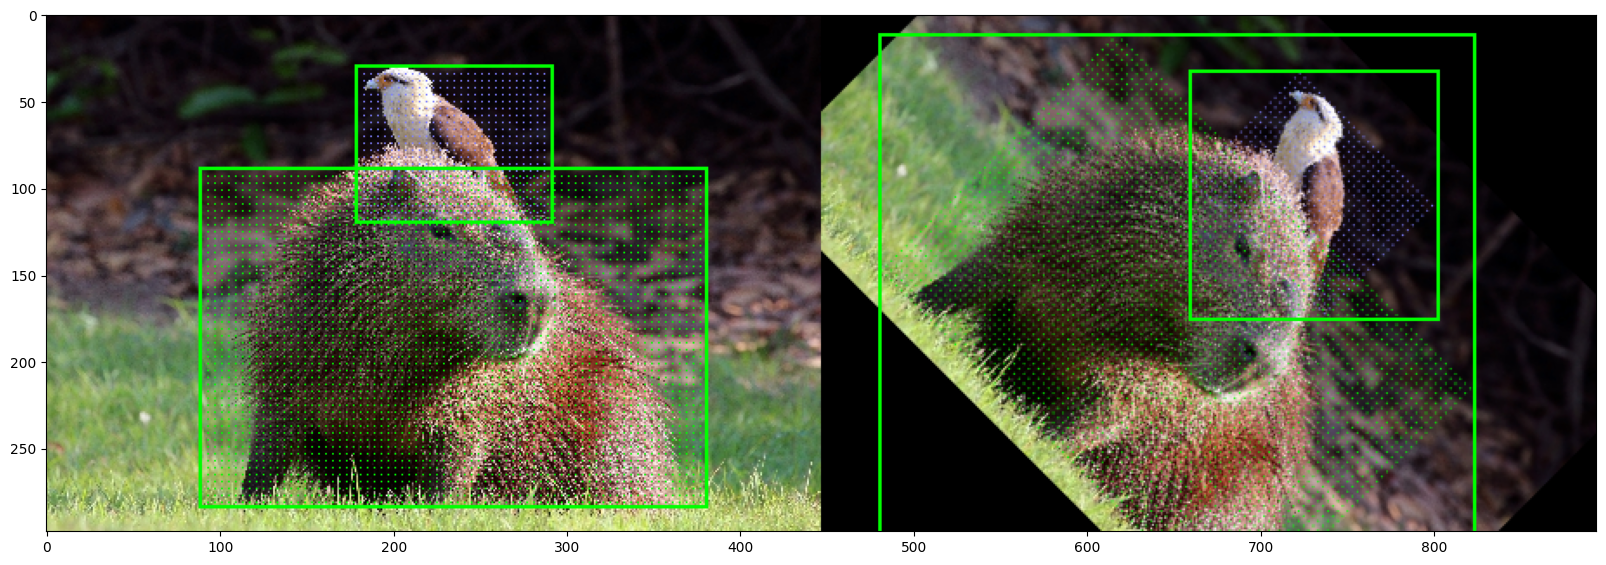

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# highlight the area of each bounding box
image_points = np.copy(image)
colors = [(0, 255, 0), (128, 128, 255)]
for bb, color in zip(bbs.bounding_boxes, colors):
    image_points[bb.y1_int:bb.y2_int:4, bb.x1_int:bb.x2_int:4] = color

# rotate the image with the highlighted bounding box areas
rot = iaa.Affine(rotate=45)
image_points_aug, bbs_aug = rot(image=image_points, bounding_boxes=bbs)

# visualize
side_by_side = np.hstack([
    bbs.draw_on_image(image_points, size=2),
    bbs_aug.draw_on_image(image_points_aug, size=2)
])
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(side_by_side)

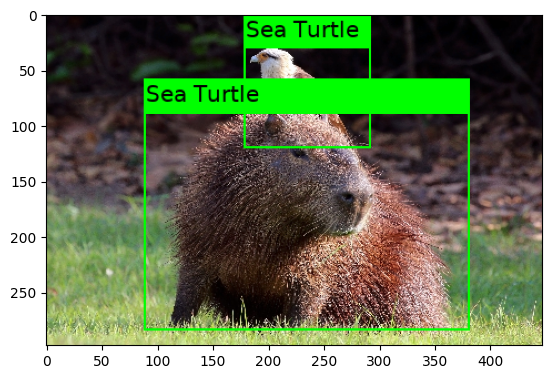

In [16]:
bbs_labeled = bbs.deepcopy()
bbs_labeled[0].label = "Sea Turtle"
bbs_labeled[1].label = "Sea Turtle"

image_bbs = bbs_labeled.draw_on_image(image, size=2)

plt.imshow(image_bbs)